# John Wu
# CSE 5524
# 9/12/22
### Libraries

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

#### 1.) Write a function to compute the 7 similitude moment shape descriptors. Test and compare results on the rectangle box images ‘boxIm[1-4].bmp’ on the website (you are to provide the 7 computed moment values). Normalize each image before computing the moments so that the range of grayscale values is between 0-1. How do the moments change across the box images? Why are some moments zero? Please make sure your function will work with non-binary (grayscale) imagery, as you will need this for later assignments (do not use Matlab’s regionprops function). [4 pts]

##### We will first define the function for similitude moments.

In [107]:
# we will define some helper functions
# centroids 
def sum_column_pixel(image): # x-bar
    rows = image.shape[0]
    cols = image.shape[1]
    mean = 0
    for r in range(rows):
        for c in range(cols): # x
            mean += c*image[r,c]
    return mean
            
def sum_row_pixels(image): # y-bar
    rows = image.shape[0]
    cols = image.shape[1]
    mean = 0
    for r in range(rows): # y
        for c in range(cols): 
            mean += r*image[r,c]
    return mean 

# central moments
def central_moment(image, colBar, rowBar, i, j):
    rows = image.shape[0]
    cols = image.shape[1]
    moment = 0
    for r in range(rows): # y
        for c in range(cols): # x (x-column is i, y-row is j)
            moment +=  np.power((c-colBar),i) * np.power((r-rowBar),j) * image[r,c]
    return moment

def denominatorTerm(sumPixels, i, j):
    return np.power(sumPixels, ((i+j) / 2.0) + 1)

# fortunately we have a specific set of similitude moments
def similitude_moments(image):
    tot = np.sum(image)
    colBar = sum_column_pixel(image) / tot
    rowBar = sum_row_pixels(image) / tot

    # hardcoded
    colMoments = np.array([0,0,1,1,2,2,3])
    rowMoments = np.array([2,3,1,2,0,1,0])
    nMoments = colMoments.shape[0]
    similitudeMoments = np.zeros(nMoments)
    for moment in range(nMoments):
        similitudeMoments[moment] = central_moment(image, colBar, rowBar,
                                    colMoments[moment], rowMoments[moment]) 
        similitudeMoments[moment] /= denominatorTerm(tot,colMoments[moment], 
                                                     rowMoments[moment])
    
    return similitudeMoments 

##### Now, let's import the images and normalize them.

In [108]:
# we can normalize all grayscale values by dividing by (pixel - min) / (max - min)
def normalize_grayscale(im):
    minPixel = 0
    maxPixel = 255
    return np.divide((im - minPixel), maxPixel - minPixel )

nImgs = 4
fileName = 'boxIm'
im = plt.imread('boxIm1.bmp') # get the first image for dimensions
allBoxIm = np.ndarray((im.shape[0], im.shape[1],nImgs))

for i in range(1,nImgs + 1):
    allBoxIm[:,:, i - 1] = plt.imread(fileName + str(i) + '.bmp')
    

for i in range(nImgs):
    allBoxIm[:,:, i] = normalize_grayscale(allBoxIm[:,:,i])

print(allBoxIm.shape)
print(np.min(allBoxIm))
print(np.max(allBoxIm))
    

(150, 200, 4)
0.0
1.0


#### We will now compute similitude moments for all 4 images and compare!

#### For the first image boxIm1, we have the image along with its similitude moments below.

Moments: [0.04215598 0.         0.         0.         0.16460905 0.
 0.        ]


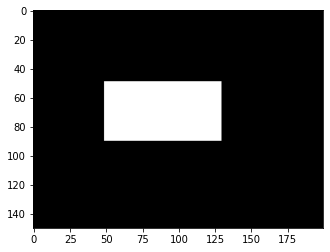

In [109]:
print("Moments:",similitude_moments(allBoxIm[:,:,0]))
plt.imshow(allBoxIm[:,:,0], cmap='gray')

#### For the second image boxIm2, we have the image along with its similitude moments below.

Moments: [0.04215598 0.         0.         0.         0.16460905 0.
 0.        ]


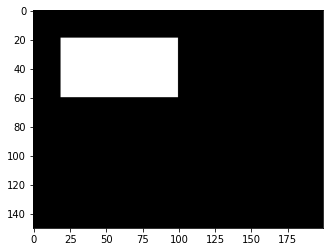

In [110]:
print("Moments:",similitude_moments(allBoxIm[:,:,1]))
plt.imshow(allBoxIm[:,:,1], cmap='gray')

#### For the third image boxIm3, we have the image along with its similitude moments below.

Moments: [0.04226884 0.         0.         0.         0.16410256 0.
 0.        ]


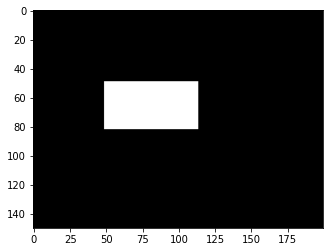

In [111]:
print("Moments:",similitude_moments(allBoxIm[:,:,2]))
plt.imshow(allBoxIm[:,:,2], cmap='gray')

#### For the final image boxIm4, we have the image along with its similitude moments below.

Moments: [0.16460905 0.         0.         0.         0.04215598 0.
 0.        ]


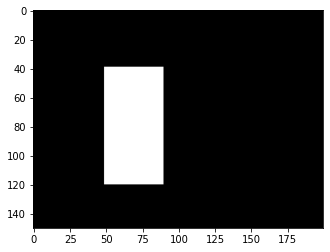

In [112]:
print("Moments:",similitude_moments(allBoxIm[:,:,3]))
plt.imshow(allBoxIm[:,:,3], cmap='gray')

### Summary and Discussion:

##### Now let's first summarize the moments and then let's discuss which similitude moments the non-zero values are. 

| image  | n02        | n03 | n11 | n12 | n20        | n21 | n30 |
|--------|------------|-----|-----|-----|------------|-----|-----|
| boxIm1 | 0.04215598 | 0   | 0   | 0   | 0.16460905 | 0   | 0   |
| boxIm2 | 0.04215598 | 0   | 0   | 0   | 0.16460905 | 0   | 0   |
| boxIm3 | 0.04226884 | 0   | 0   | 0   | 0.16410256 | 0   | 0   |
| boxIm4 | 0.16460905 | 0   | 0   | 0   | 0.04215598 | 0   | 0   |

##### In this case, for all 4 box images, the only non-zero similitude moments are the first and fifth moments, which correspond to the (ij), (02) and (20) respectively. These moments provide information specifically about the top versus down (02) and side to side shapes (20). In other words, they provide insights on the x,y axis shapes of the images respectively. This makes sense, because we are looking at rectangles, which don't have "round" (or any other shape) features on the diagonal corners (or edges). This lack of diagonal features correspond to the 0 moments seen in the table above. 

##### Furthermore, since similitude moments are invariant to translation and scale, we can see that the n02, and n20 values are at least almost the same for boxIm1, boxIm2, and boxIm3. These almost equal values makes sense, because the difference between boxIm2 and boxIm1 is that boxIm2 is just boxIm1 translated towards the top left. Similarly, observe that boxIm3 is just a scaled version of boxIm1, which validates that similitude moments are scale invariant. 

##### On the other hand, boxIm4 has its moments flipped between n02 and n20, which also makes sense as boxIm4 is just boxIm1 rotated. Similitude moments are not invariant to rotations, but in this case, the flipped values make sense, as now the width of boxIm1 is the height of boxIm4, and the height of boxIm1 is the width of boxIm4.




### 2.) Using the datafile (eigdata.txt) provided on the WWW site, perform the following MATLAB commands [1 pt]

    %% Load the data
    clear; close all;
    load eigdata.txt;
    X = eigdata;
    subplot(2,1,1);
    plot(X(:,1),X(:,2),'b.');
    axis(‘equal’);
    
    %% mean-subtract data
    m = mean(X);
    Y = X – ones(size(X,1),1)*m;
    subplot(2,1,2);
    plot(Y(:,1),Y(:,2),'r.');
    axis(‘equal’);

    In our case, we will try to do this in python.

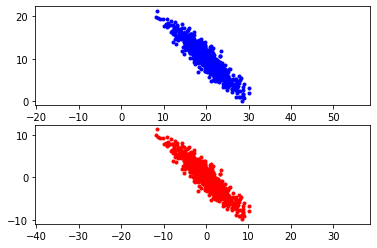

In [113]:
X = np.loadtxt('eigdata.txt') # notice how we set X to be the eigData
plt.figure()
plt.subplot(2,1,1)
plt.plot(X[:,0], X[:,1], 'b.')
plt.axis('equal')

m = np.mean(X,axis=0)

means = np.ones(X.shape)
means[:,0] = m[0] * means[:,0] # make sure 1st column mean
means[:,1] = m[1] * means[:,1] # make sure 2nd column mean
Y = X - means

plt.subplot(2,1,2)
plt.plot(Y[:,0], Y[:,1], 'r.')
plt.axis('equal')
plt.savefig('Problem2Displayed.png')


##### Quick Note: All values are now centered around the origin.
### 3.) Compute the eigenvalues (V) and eigenvectors (U) of the data (stored in Y) using the function eig() in Matlab (recall that you use either the covariance matrix or the inverse-covariance matrix of the data – see class notes). Plot the mean-subtracted data Y and the 2-D Gaussian ellipse axes for given the eigenvectors in U (you can use the plot command in Matlab for this. Make sure the axes have equal scale in the plot!). Use the eigenvalues in V to give the appropriate 3σ (standard deviation - not variance!) length to each axis (did you compute the eigenvalues from the covariance or inverse covariance of Y? The eigenvalues will be related but different! See class notes). [4 pts]

    [Note: it would also be nice to draw the 3σ ellipse around Y if you can – Google ‘matlab ellipse.m’ for some Matlab code if you are interested.]

In [114]:
# found a way to plot ellipses based on eigenvalues and eigenvectors 
def plot_ellipse(eigenvalues, eigenvectors):
    theta = np.linspace(0, 2*np.pi, 1000);
    ellipsis = (np.sqrt(eigenvalues[None,:]) * eigenvectors) 
    ellipsis = ellipsis @ [np.sin(theta), np.cos(theta)]
    plt.plot(ellipsis[0,:], ellipsis[1,:])
 

EigenVectors: [[ 0.71259733  0.70157327]
 [-0.70157327  0.71259733]]
EigenValues: [24.13847816  1.01422313]


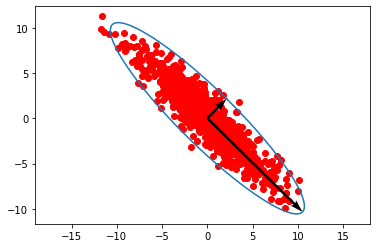

In [115]:
V, U = np.linalg.eig(np.cov(Y.transpose())) # get the eigenvalues and eigenvectors
C = 9 # number of standard deviations is sqrt(9) = 3 sigma
print('EigenVectors:',U) # axes stored in U
print('EigenValues:', V) # magnitudes are sqrt(C*lambda, eigen values in U)
plt.figure()
origin = 0 # origin point
# this is the magnitude of the length of each axis given standard deviation
magnitude = np.sqrt(C*V)
eigenVec1 = magnitude[0] * U[:,0]
eigenVec2 = magnitude[1] * U[:,1]

# plot the data points with the eigen vectors
plt.scatter(Y[:,0], Y[:,1], color='red')
# note that python does a very wacky way to plot vectors, i.e first two define X,Y points for origin, the next 2 define the 2 points of vector.
plt.quiver(origin, origin, eigenVec1[0], eigenVec1[1], angles='xy', 
           scale_units='xy', scale=1)
plt.quiver(origin, origin, eigenVec2[0], eigenVec2[1], angles='xy', 
           scale_units='xy', scale=1)
# I literally found a function online for plotting ellipses, note we just pass in the C*V
plot_ellipse(C*V, U)
plt.axis('equal')
plt.savefig('Problem3.png')

##### Quick self-notes: Looks like we capture around 99% of the data with both our ellipse and "gaussian" axes. 

### 4.) Rotate Y using the eigenvectors to make the data uncorrelated (i.e., project data Y onto the eigenvectors – see class slides). Plot the results (using equal scale axes as before). [2 pts]

(1000, 2)


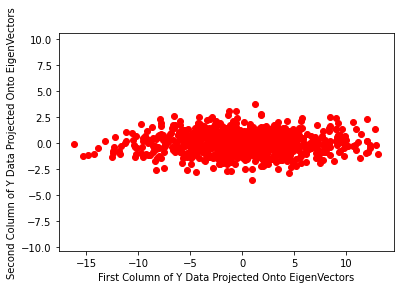

In [116]:
rotatedY = np.matmul(Y, U) # Y ~ Nx2 * 2x2 = Nx2
print(rotatedY.shape)
plt.scatter(rotatedY[:,0], rotatedY[:,1], color='red')
plt.xlabel('First Column of Y Data Projected Onto EigenVectors')
plt.ylabel('Second Column of Y Data Projected Onto EigenVectors')
plt.axis('equal')
plt.savefig('Problem4RotatedY.png')

### Quick Note:
##### Through this multiplication, observe that we have rotated it such that it's no longer "diagonal" and it's horizontal without a clear correlation.

### 5.) Perform a simple data reduction technique by keeping only the values resulting from projection of Y onto the eigenvector corresponding the largest eigenvalue of the covariance (not inverse-covariance) matrix. Plot a 1-D histogram of the values. Does it look like a 1-D Gaussian? [1 pt]

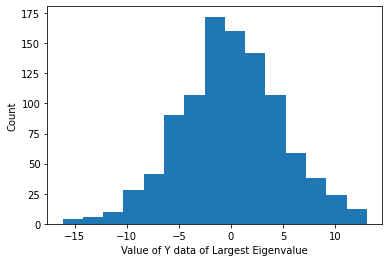

In [117]:
maxEigValue = 0 # note that we only have 2 eigenvalues
for i in range(V.shape[0]):
    if V[maxEigValue] < V[i]:
        maxEigValue = i
rotatedYReduced = rotatedY[:,maxEigValue]
plt.hist(rotatedYReduced,bins=15) # note by default, only 10 bins are used. We pick 15.
plt.ylabel("Count")
plt.xlabel('Value of Y data of Largest Eigenvalue')
plt.savefig('Problem5Histogram')


### Quick Summary/Discussion:
##### Cool enough, the range of values of the axis with the largest variance matches the one seen in problem 4! It's also interesting to note that it does indeed look like a gaussian (centered around 0), which also makes sense due to the elliptical shape seen above. I would presume depending on the number of clusters, this would change from dataset to dataset.